<H1 style = "color : blue"> Operations on Pandas </H1>

## Table of Content
1. <b>Filtering dataframes:</b> Single and multiple conditions
2. <b>Creating new columns</b>
3. <b>Lambda functions </b>
4. <b>Group by and aggregate functions </b>
5. <b>Pivot data </b>
6. <b>Merging data frames :</b> Joins and concatenations

<h4 style = "color : Sky blue"> Preparatory steps</h4>  

##### Background

An FMCG company P&J found that the sales of their best selling items are affected by the weather and rainfall trend. For example, the sale of tea increases when it rains, sunscreen is sold on the days when it is least likely to rain, and the sky is clear. They would like to check whether the weather patterns play a vital role in the sale of certain items. Hence as initial experimentation, they would like you to forecast the weather trend in the upcoming days. The target region for this activity is Australia; accordingly, this exercise will be based on analysing and cleaning the weather data from the Australian region available on public platforms.  

##### Read the data into a dataframe

In [3]:
import pandas as pd

In [5]:
data = pd.read_csv("Data/weatherdata.csv",header = 0)

##### Display the data 

In [7]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0


##### Data Dictionary 

1. Date: The date on which the recording was taken
2. Location: The location of the recording
3. MinTemp: Minimum temperature on the day of the recording (in C)
4. MaxTemp: Maximum temperature in the day of the recording (in C)
5. Rainfall: Rainfall in mm
6. Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7. Sunshine: The number of hours of bright sunshine in the day.
8. WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
9. WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight

<h4 style = "color : Sky blue"> Example 1.1: Filtering dataframes</h4>

Find the days which had sunshine for more that 4 hours. These days will have increased sales of sunscreen. 

In [15]:
data[data["Sunshine"] > 4]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0
5941,2009-01-03,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0
...,...,...,...,...,...,...,...,...,...
139108,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0
139109,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0
139110,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0
139111,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0


In [16]:
data[data["Sunshine"] > 4].Date

5939      2009-01-01
5940      2009-01-02
5941      2009-01-03
5942      2009-01-04
5943      2009-01-05
             ...    
139108    2017-06-20
139109    2017-06-21
139110    2017-06-22
139111    2017-06-23
139112    2017-06-24
Name: Date, Length: 58898, dtype: object

**Note:** High sunshine corresponds to low rainfall. 

<h4 style = "color : Sky blue"> Example 1.2: Filtering dataframes</h4>

The cold drink sales will most likely increase on the days which have high sunshine(>5) and high max temperature(>35). Use the filter operation to filter out these days

In [19]:
data[(data["Sunshine"] > 4) & (data["MaxTemp"]>35)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0
5948,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0
...,...,...,...,...,...,...,...,...,...
138862,2016-10-17,Darwin,25.1,35.2,0.0,7.4,11.5,NNE,39.0
138879,2016-11-03,Darwin,24.4,35.5,0.0,7.8,9.9,NW,35.0
138892,2016-11-16,Darwin,25.7,35.2,0.0,5.4,11.3,NW,26.0
138905,2016-11-29,Darwin,25.8,35.1,0.8,4.8,6.4,SSE,46.0


**Note:** The construction of the filter condition, it has individual filter conditions separated in parenthesis

In [20]:
data[(data["Sunshine"] > 4) & (data["MaxTemp"]>35)].shape

(3915, 9)

<h4 style = "color : Sky blue"> Example 2.1: Creating new columns</h4>
    
If you noticed the filtering done in the earlier examples did not give precise information about the days, the data column simply has the dates. The date column can be split into the year, month and day of the month. 

**Special module of pandas** The "DatetimeIndex" is a particular module which has the capabilities to extract a day, month and year form the date. 

In [28]:
pd.DatetimeIndex(data["Date"]).week

Int64Index([49, 49, 49, 49, 49, 49, 49, 50, 50, 50,
            ...
            24, 24, 24, 24, 25, 25, 25, 25, 25, 25],
           dtype='int64', name='Date', length=142193)

**Adding New columns** To add a new column in the dataframe just name the column and pass the instructions about the creation of the new column 

In [29]:
data["Year"] = pd.DatetimeIndex(data["Date"]).year

In [31]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,2008


In [33]:
data["Month"] = pd.DatetimeIndex(data["Date"]).month
data["DayofMonth"] = pd.DatetimeIndex(data["Date"]).day
data["Week"] = pd.DatetimeIndex(data["Date"]).week
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month,DayofMonth,Week
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,2008,12,1,49
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,2008,12,2,49
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,2008,12,3,49
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,2008,12,4,49
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,2008,12,5,49


<h4 style = "color : Sky blue"> Example 2.2: Creating new columns</h4>

The temperature given is in Celcius, convert it in Fahrenheit and store it in a new column for it. 

In [34]:
data["Maxtemp_F"] = data["MaxTemp"] * 9/5 + 32
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month,DayofMonth,Week,Maxtemp_F
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,2008,12,1,49,73.22
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,2008,12,2,49,77.18
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,2008,12,3,49,78.26
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,2008,12,4,49,82.40
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,2008,12,5,49,90.14


<h4 style = "color : Sky blue"> Example 3.1: Lambda Functions</h4>

Let's create a new column which highlights the days which have rainfall more than 50 mm as rainy days and the rest are not.

In [38]:
data["Rainfall"].apply(lambda x : "Rainy" if x > 50 else "Not Rainy")


0         Not Rainy
1         Not Rainy
2         Not Rainy
3         Not Rainy
4         Not Rainy
            ...    
142188    Not Rainy
142189    Not Rainy
142190    Not Rainy
142191    Not Rainy
142192    Not Rainy
Name: Rainfall, Length: 142193, dtype: object

**Note** 
1. New way of accessing a column in a dataframe by using the dot operator.
2. "apply" function takes in a lambda operator as argument. 

In [39]:
type(data["Rainfall"])

pandas.core.series.Series

In [40]:
data["is_raining"] = data["Rainfall"].apply(lambda x : "Rainy" if x > 50 else "Not Rainy")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month,DayofMonth,Week,Maxtemp_F,is_raining
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,2008,12,1,49,73.22,Not Rainy
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,2008,12,2,49,77.18,Not Rainy
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,2008,12,3,49,78.26,Not Rainy
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,2008,12,4,49,82.40,Not Rainy
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,2008,12,5,49,90.14,Not Rainy


In [41]:
data["is_raining2"] = data.Rainfall.apply(lambda x : "Rainy" if x > 50 else "Not Rainy")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month,DayofMonth,Week,Maxtemp_F,is_raining,is_raining2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,2008,12,1,49,73.22,Not Rainy,Not Rainy
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,2008,12,2,49,77.18,Not Rainy,Not Rainy
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,2008,12,3,49,78.26,Not Rainy,Not Rainy
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,2008,12,4,49,82.40,Not Rainy,Not Rainy
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,2008,12,5,49,90.14,Not Rainy,Not Rainy


In [42]:
data[data["is_raining"] == "Rainy"]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month,DayofMonth,Week,Maxtemp_F,is_raining,is_raining2
429,2010-02-05,Albury,19.2,26.1,52.2,NaN,NaN,SE,33.0,2010,2,5,5,78.98,Rainy,Rainy
455,2010-03-08,Albury,18.1,25.5,66.0,NaN,NaN,NW,56.0,2010,3,8,10,77.90,Rainy,Rainy
690,2010-10-31,Albury,13.8,18.7,50.8,NaN,NaN,NNW,52.0,2010,10,31,43,65.66,Rainy,Rainy
704,2010-11-14,Albury,19.2,22.6,52.6,NaN,NaN,N,26.0,2010,11,14,45,72.68,Rainy,Rainy
787,2011-02-05,Albury,20.4,23.0,99.2,NaN,NaN,NW,28.0,2011,2,5,5,73.40,Rainy,Rainy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140532,2017-02-03,Katherine,23.4,33.0,62.0,NaN,NaN,NNW,33.0,2017,2,3,5,91.40,Rainy,Rainy
140571,2017-03-14,Katherine,23.0,35.0,79.0,31.0,NaN,ESE,22.0,2017,3,14,11,95.00,Rainy,Rainy
140578,2017-03-22,Katherine,24.1,34.5,61.4,NaN,NaN,N,31.0,2017,3,22,12,94.10,Rainy,Rainy
142013,2016-12-26,Uluru,22.1,27.4,83.8,NaN,NaN,ENE,72.0,2016,12,26,52,81.32,Rainy,Rainy


<H2 style = "color : sky blue">Employee Training</H2><br>
<b>Description</b><br>
You are provided with the dataset of a company which has offices across three cities - Mumbai, Bangalore and New Delhi. The dataset contains the rating (out of 5) of all the employees from different departments (Finance, HR, Marketing and Sales). 



The company has come up with a new policy that any individual with a rating equal to or below 3.5 needs to attend a training. Using dataframes, load the dataset and then derive the column ‘Training’ which shows ‘Yes’ for people who require training and ‘No’ for those who do not.



Print the first 5 rows as the output. Refer to the image below for your reference.
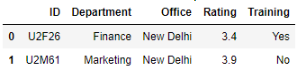




Note: You should not sort or modify values in other columns of the dataframe.

Execution Time Limit

In [47]:
import numpy as np
import pandas as pd

# The file is stored at the following path:
# 'https://media-doselect.s3.amazonaws.com/generic/NMgEjwkAEGGQZBoNYGr9Ld7w0/rating.csv'
df = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/NMgEjwkAEGGQZBoNYGr9Ld7w0/rating.csv')

# Provide your answer below
df["Training"] = df.Rating.apply(lambda x : "Yes" if x <= 3.5 else "No")
df
#print(df.head())

,ID,Department,Office,Rating,Training
0,U2F26,Finance,New Delhi,3.4,Yes
1,U2M61,Marketing,New Delhi,3.9,No
2,U1S15,Sales,New Delhi,2.8,Yes
3,U1H87,HR,Mumbai,2.1,Yes
4,U1S51,Sales,New Delhi,4.6,No
...,...,...,...,...,...
528,U3S44,Sales,New Delhi,4.8,No
529,U2M11,Marketing,Bangalore,2.5,Yes
530,U3F53,Finance,Bangalore,3.2,Yes
531,U3S46,Sales,Bangalore,2.9,Yes


In [59]:
for i in ['Finance', 'HR', 'Sales', 'Marketing']:
    print(i, len(df[(df['Training'] == 'No') & (df['Department'] == i)]) / len(df[df['Department'] == i]) * 100)

Finance 50.0
HR 57.25190839694656
Sales 49.23076923076923
Marketing 46.3768115942029


In [61]:
df[df["Training"] == "No"].groupby(by=["Department"]).count().Training / df.groupby(by = ["Department"]).count().Training


Department
Finance      0.500000
HR           0.572519
Marketing    0.463768
Sales        0.492308
Name: Training, dtype: float64

<h4 style = "color : Sky blue"> Example 4.1: Grouping and Aggregate functions</h4>

Find the location which received the most amount of rain in the given data. In this place, certain promotional offers can be put in place to boost sales of tea, umbrella etc.  

In [62]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month,DayofMonth,Week,Maxtemp_F,is_raining,is_raining2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,2008,12,1,49,73.22,Not Rainy,Not Rainy
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,2008,12,2,49,77.18,Not Rainy,Not Rainy
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,2008,12,3,49,78.26,Not Rainy,Not Rainy
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,2008,12,4,49,82.40,Not Rainy,Not Rainy
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,2008,12,5,49,90.14,Not Rainy,Not Rainy


In [67]:
data_byLocation = data.groupby(by = ["Location"]).mean()
data_byLocation.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Year,Month,DayofMonth,Week,Maxtemp_F
Location,,,,,,,,,,,
Adelaide,12.628368,22.945402,1.572185,5.824924,7.752002,36.530812,2012.525890,6.523948,15.740453,26.642395,73.301723
Albany,12.948461,20.072587,2.255073,4.207273,6.658765,NaN,2012.708554,6.413130,15.680371,26.151525,68.130657
Albury,9.520899,22.630963,1.925710,NaN,NaN,32.953016,2012.733643,6.412488,15.745932,26.141481,72.735734
AliceSprings,13.125182,29.244191,0.869355,9.029929,9.581944,40.533714,2012.719565,6.407456,15.689211,26.112504,84.639545
BadgerysCreek,11.136900,24.023111,2.207925,NaN,NaN,33.609890,2012.790984,6.326161,15.769467,25.824112,75.241600


In [69]:
data_byLocation.sort_values("Rainfall",ascending = False).head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Year,Month,DayofMonth,Week,Maxtemp_F
Location,,,,,,,,,,,
Cairns,21.199197,29.544344,5.765317,6.211976,7.575995,38.067991,2012.677376,6.363454,15.720214,25.930723,85.179819
Darwin,23.210530,32.540977,5.094048,6.319089,8.499310,40.582355,2012.502820,6.534461,15.716792,26.678258,90.573759
CoffsHarbour,14.365774,23.915575,5.054592,3.904267,7.362374,39.232197,2012.749746,6.392482,15.716898,26.110396,75.048035
GoldCoast,17.341490,25.752971,3.728933,NaN,NaN,42.472539,2012.683221,6.435906,15.717114,26.221141,78.355347
Wollongong,14.949058,21.476510,3.589127,NaN,NaN,45.695257,2012.743882,6.423734,15.694268,26.186725,70.657718


<h4 style = "color : Sky blue"> Example 4.2: Grouping and Aggregate functions</h4>

Hot chocolate is the most sold product in the cold months. Find month which is the coldest so that the inventory team can keep the stock of hot chocolate ready well in advance. 

In [71]:
data_bymonth = data.groupby(by = ["Month"]).mean()
data_bymonth.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Year,DayofMonth,Week,Maxtemp_F
Month,,,,,,,,,,
1,17.520778,29.547362,2.719036,8.773171,9.208942,43.361730,2013.042721,15.986688,4.564430,85.185252
2,17.500239,28.877704,3.174075,7.651018,8.607494,41.457472,2013.054822,14.643515,6.917815,83.979867
3,15.904347,26.886744,2.801304,6.237989,7.646279,39.546399,2013.024778,15.995321,11.164314,80.396138
4,12.831979,23.611845,2.314764,4.547511,7.107208,36.460285,2013.279055,15.492659,15.556696,74.501320
5,9.618572,20.047202,1.978896,3.244134,6.337496,35.721056,2013.040214,15.991038,19.873382,68.084964


In [73]:
data_bymonth.sort_values("MinTemp",ascending = True).head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Year,DayofMonth,Week,Maxtemp_F
Month,,,,,,,,,,
7,6.951308,16.764242,2.179314,2.699269,6.069790,37.891458,2012.467867,16.001528,28.615332,62.175636
8,7.465145,18.258930,2.029610,3.616533,7.171661,40.245052,2012.473474,16.022275,33.047951,64.866074
6,7.815031,17.324778,2.781114,2.518705,5.660379,35.506375,2012.975381,15.257648,24.204536,63.184600
9,9.460189,20.772510,1.875851,4.917265,7.698770,42.213311,2012.461084,15.518378,37.406611,69.390517
5,9.618572,20.047202,1.978896,3.244134,6.337496,35.721056,2013.040214,15.991038,19.873382,68.084964


<h4 style = "color : Sky blue"> Example 4.3: Grouping and Aggregate functions</h4>

Sometimes feeling cold is more than about low temperatures; a windy day can also make you cold. A factor called the cill factor can be used to quantify the cold based on the wind speed and the temperature. The formula for the chill factor is given by 


$ WCI = (10 * \sqrt{v} - v + 10.5) .(33 - T_{m}) $

v is the speed of the wind and $ T_{m} $ is the minimum temperature

Add a column for WCI and find the month with th lowest WCI. 

In [76]:
from math import sqrt
def wci(x): # x is a row of dataframe
    velocity = x["WindGustSpeed"]
    mintemp = x["MinTemp"]
    return ((10 * sqrt(velocity)- velocity + 10.5) * (33 - mintemp))

In [77]:
data["WCI"] = data.apply(wci,axis = 1)

In [79]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month,DayofMonth,Week,Maxtemp_F,is_raining,is_raining2,WCI
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,2008,12,1,49,73.22,Not Rainy,Not Rainy,643.516918
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,2008,12,2,49,77.18,Not Rainy,Not Rainy,840.511893
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,2008,12,3,49,78.26,Not Rainy,Not Rainy,649.698327
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,2008,12,4,49,82.40,Not Rainy,Not Rainy,844.657118
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,2008,12,5,49,90.14,Not Rainy,Not Rainy,519.734257


In [81]:
Data_byMonth = data.groupby(by = ["Month"]).mean()
Data_byMonth

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Year,DayofMonth,Week,Maxtemp_F,WCI
Month,,,,,,,,,,,
1,17.520778,29.547362,2.719036,8.773171,9.208942,43.361730,2013.042721,15.986688,4.564430,85.185252,504.169996
2,17.500239,28.877704,3.174075,7.651018,8.607494,41.457472,2013.054822,14.643515,6.917815,83.979867,511.722359
3,15.904347,26.886744,2.801304,6.237989,7.646279,39.546399,2013.024778,15.995321,11.164314,80.396138,570.372892
4,12.831979,23.611845,2.314764,4.547511,7.107208,36.460285,2013.279055,15.492659,15.556696,74.501320,680.791840
5,9.618572,20.047202,1.978896,3.244134,6.337496,35.721056,2013.040214,15.991038,19.873382,68.084964,787.434259
6,7.815031,17.324778,2.781114,2.518705,5.660379,35.506375,2012.975381,15.257648,24.204536,63.184600,845.755217
7,6.951308,16.764242,2.179314,2.699269,6.069790,37.891458,2012.467867,16.001528,28.615332,62.175636,863.519699
8,7.465145,18.258930,2.029610,3.616533,7.171661,40.245052,2012.473474,16.022275,33.047951,64.866074,836.501471
9,9.460189,20.772510,1.875851,4.917265,7.698770,42.213311,2012.461084,15.518378,37.406611,69.390517,762.816683


In [82]:
Data_byMonth.sort_values("WCI",ascending = False)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Year,DayofMonth,Week,Maxtemp_F,WCI
Month,,,,,,,,,,,
7,6.951308,16.764242,2.179314,2.699269,6.069790,37.891458,2012.467867,16.001528,28.615332,62.175636,863.519699
6,7.815031,17.324778,2.781114,2.518705,5.660379,35.506375,2012.975381,15.257648,24.204536,63.184600,845.755217
8,7.465145,18.258930,2.029610,3.616533,7.171661,40.245052,2012.473474,16.022275,33.047951,64.866074,836.501471
5,9.618572,20.047202,1.978896,3.244134,6.337496,35.721056,2013.040214,15.991038,19.873382,68.084964,787.434259
9,9.460189,20.772510,1.875851,4.917265,7.698770,42.213311,2012.461084,15.518378,37.406611,69.390517,762.816683
10,11.531145,23.540695,1.610734,6.379571,8.500080,42.716694,2012.462725,16.026771,41.758641,74.373252,697.875616
4,12.831979,23.611845,2.314764,4.547511,7.107208,36.460285,2013.279055,15.492659,15.556696,74.501320,680.791840
11,14.299624,26.165571,2.273758,7.465236,8.685394,42.582385,2012.435041,15.498211,46.115173,79.098028,612.435126
3,15.904347,26.886744,2.801304,6.237989,7.646279,39.546399,2013.024778,15.995321,11.164314,80.396138,570.372892


<H4 style = "color : sky blue">Dataframe grouping</H4>

<b>Description</b><br>
Group the dataframe 'df' by 'month' and 'day' and find the mean value for column 'rain' and 'wind'.

In [95]:
import pandas as pd
df = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/2enQZ7AXJQkVOL1QW3BgVOarW/forestfires.csv')
#Type your groupby command here
df_1 = df.groupby(["month","day"])[["rain","wind"]].mean()
print(df_1.head(20))

               rain      wind
month day                    
apr   fri  0.000000  3.100000
      mon  0.000000  3.100000
      sat  0.000000  4.500000
      sun  0.000000  5.666667
      thu  0.000000  5.800000
      wed  0.000000  2.700000
aug   fri  0.066667  4.766667
      mon  0.000000  2.873333
      sat  0.000000  4.310345
      sun  0.025000  4.417500
      thu  0.000000  3.503846
      tue  0.300000  4.567857
      wed  0.000000  3.520000
dec   fri  0.000000  4.900000
      mon  0.000000  8.500000
      sun  0.000000  8.500000
      thu  0.000000  4.900000
      tue  0.000000  8.500000
      wed  0.000000  8.000000
feb   fri  0.000000  4.820000


<h4 style = "color : Sky blue"> Example 5.1: Merging Dataframes</h4>

The join command is used to combine dataframes. Unlike hstack and vstack, the join command works by using a key to combine to dataframes. 

For example the total tea for the Newcastle store for the month of June 2011 is given in the file names ```junesales.csv``` Read in the data from the file and join it to the weather data exracted from the original dataframe. 

In [96]:
sales = pd.read_csv("Data/junesales.csv",header = 0)
sales.head()

,Date,Tea_sales(in 100's)
0,6/1/2011,26
1,6/2/2011,35
2,6/3/2011,37
3,6/4/2011,33
4,6/5/2011,25


In [100]:
sales["DayofMonth"] = pd.DatetimeIndex(sales["Date"]).day

In [102]:
sales.head()

,Date,Tea_sales(in 100's),DayofMonth
0,6/1/2011,26,1
1,6/2/2011,35,2
2,6/3/2011,37,3
3,6/4/2011,33,4
4,6/5/2011,25,5


In [104]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month,DayofMonth,Week,Maxtemp_F,is_raining,is_raining2,WCI
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,2008,12,1,49,73.22,Not Rainy,Not Rainy,643.516918
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,2008,12,2,49,77.18,Not Rainy,Not Rainy,840.511893
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,2008,12,3,49,78.26,Not Rainy,Not Rainy,649.698327
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,2008,12,4,49,82.40,Not Rainy,Not Rainy,844.657118
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,2008,12,5,49,90.14,Not Rainy,Not Rainy,519.734257


In [109]:
Newcastle_data = data[ (data["Location"] == 'Newcastle')  & (data["Year"] == 2011) & (data["Month"] == 6)]
Newcastle_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month,DayofMonth,Week,Maxtemp_F,is_raining,is_raining2,WCI
15605,2011-06-01,Newcastle,NaN,21.2,6.0,NaN,NaN,NaN,NaN,2011,6,1,22,70.16,Not Rainy,Not Rainy,NaN
15606,2011-06-02,Newcastle,NaN,20.2,4.0,NaN,NaN,NaN,NaN,2011,6,2,22,68.36,Not Rainy,Not Rainy,NaN
15607,2011-06-03,Newcastle,10.7,20.2,0.4,NaN,NaN,NaN,NaN,2011,6,3,22,68.36,Not Rainy,Not Rainy,NaN
15608,2011-06-04,Newcastle,9.4,20.4,0.0,NaN,NaN,NaN,NaN,2011,6,4,22,68.72,Not Rainy,Not Rainy,NaN
15609,2011-06-05,Newcastle,9.6,18.8,3.0,NaN,NaN,NaN,NaN,2011,6,5,22,65.84,Not Rainy,Not Rainy,NaN


In [113]:
merge_data = Newcastle_data.merge(sales,on = "DayofMonth")
merge_data.head()

,Date_x,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month,DayofMonth,Week,Maxtemp_F,is_raining,is_raining2,WCI,Date_y,Tea_sales(in 100's)
0,2011-06-01,Newcastle,NaN,21.2,6.0,NaN,NaN,NaN,NaN,2011,6,1,22,70.16,Not Rainy,Not Rainy,NaN,6/1/2011,26
1,2011-06-02,Newcastle,NaN,20.2,4.0,NaN,NaN,NaN,NaN,2011,6,2,22,68.36,Not Rainy,Not Rainy,NaN,6/2/2011,35
2,2011-06-03,Newcastle,10.7,20.2,0.4,NaN,NaN,NaN,NaN,2011,6,3,22,68.36,Not Rainy,Not Rainy,NaN,6/3/2011,37
3,2011-06-04,Newcastle,9.4,20.4,0.0,NaN,NaN,NaN,NaN,2011,6,4,22,68.72,Not Rainy,Not Rainy,NaN,6/4/2011,33
4,2011-06-05,Newcastle,9.6,18.8,3.0,NaN,NaN,NaN,NaN,2011,6,5,22,65.84,Not Rainy,Not Rainy,NaN,6/5/2011,25


<h4 style = "color : Sky blue"> Example 5.2: Merging Dataframes</h4>

##### Types of joins. 

* INNER JOIN
![](1.png)

* LEFT JOIN
![](2.png)

* RIGHT JOIN
![](5.png)

* FULL JOIN
![](4.png)


Each state may have different tax laws, so we might want to add the states information to the data as well.

The file ```locationsandstates.csv``` information about the states and location, the data in this file is **not** same as the weather data. It is possible that few locations in "data" (original dataframe) are not in this file, and all the locations in the file might not be in the original dataframe. 

In the original dataframe add the state data. 

In [114]:
state = pd.read_csv("Data/locationsandstates.csv",header = 0)
state.head()

,Location,State
0,Sydney,New South Wales
1,Albury,New South Wales
2,Armidale,New South Wales
3,Bathurst,New South Wales
4,Blue Mountains,New South Wales


In [117]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [119]:
state_data = data.merge(state, on = "Location", how = "left")
state_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month,DayofMonth,Week,Maxtemp_F,is_raining,is_raining2,WCI,State
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,2008,12,1,49,73.22,Not Rainy,Not Rainy,643.516918,New South Wales
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,2008,12,2,49,77.18,Not Rainy,Not Rainy,840.511893,New South Wales
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,2008,12,3,49,78.26,Not Rainy,Not Rainy,649.698327,New South Wales
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,2008,12,4,49,82.40,Not Rainy,Not Rainy,844.657118,New South Wales
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,2008,12,5,49,90.14,Not Rainy,Not Rainy,519.734257,New South Wales


<H3 style = "color : sky blue">Dataframes Merge</H3><br>
<b>Description :</b><br>
Perform an inner merge on two data frames df_1 and df_2 on  'unique_id' and print the combined dataframe.

In [121]:
import pandas as pd
df_1 = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/0gPv2eEQRrk2wgkYRqaVkqLeo/restaurant-1.csv')
df_2 = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/5JgANVqwLkBYwxkyZ7VK2XEpA/restaurant-2.csv')
df_3 = df_1.merge(df_2,on = "unique_id",how = "inner")
print(df_3.head(20))

                           name                     address              city  \
0     arnie morton's of chicago   "435 s. la cienega blvd."     "los angeles"   
1                    art's deli       "12224 ventura blvd."     "studio city"   
2                 bel-air hotel      "701 stone canyon rd."         "bel air"   
3                    cafe bizou       "14016 ventura blvd."    "sherman oaks"   
4                     campanile       "624 s. la brea ave."     "los angeles"   
5               chinois on main             "2709 main st."    "santa monica"   
6                        citrus         "6703 melrose ave."     "los angeles"   
7           fenix at the argyle         "8358 sunset blvd."    "w. hollywood"   
8                       granita       "23725 w. malibu rd."          "malibu"   
9                    grill  the           "9560 dayton way"   "beverly hills"   
10                        katsu       "1972 hillhurst ave."       "los feliz"   
11                  l'orange

<H4 style = "color : sky blue">Dataframe Append</H4>

<b>Description:</b><br>
Append two datasets df_1 and df_2, and print the combined dataframe.

In [122]:
# Suppressing warnings
import warnings
warnings.simplefilter("ignore")

import pandas as pd
df_1 = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/g5zP2pbkPoO7GnANK0v8L13RV/restaurant-1.csv')
df_2 = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/5JgANVqwLkBYwxkyZ7VK2XEpA/restaurant-2.csv')
df_3 = pd.concat([df_1,df_2], axis = 0)

print(df_3.head())

                        name                     address             city  \
0  arnie morton's of chicago   "435 s. la cienega blvd."    "los angeles"   
1                 art's deli       "12224 ventura blvd."    "studio city"   
2              bel-air hotel      "701 stone canyon rd."        "bel air"   
3                 cafe bizou       "14016 ventura blvd."   "sherman oaks"   
4                  campanile       "624 s. la brea ave."    "los angeles"   

            cuisine unique_id name_2 address_2 city_2 cuisine_2  
0     "steakhouses"       '0'    NaN       NaN    NaN       NaN  
1           "delis"       '1'    NaN       NaN    NaN       NaN  
2     "californian"       '2'    NaN       NaN    NaN       NaN  
3   "french bistro"       '3'    NaN       NaN    NaN       NaN  
4     "californian"       '4'    NaN       NaN    NaN       NaN  


<H4 style = "color : sky blue">Operations on multiple dataframes</H4>

<b>Description:</b><br>
Given three data frames containing the number of gold, silver, and bronze Olympic medals won by some countries, determine the total number of medals won by each country. 

Note: All three data frames don’t have all the same countries. So, ensure you use the ‘fill_value’ argument (set it to zero), to avoid getting NaN values. Also, ensure you sort the final data frame, according to the total medal count in descending order. Make sure that the results are in integers.



In [129]:
import numpy as np 
import pandas as pd

# Defining the three dataframes indicating the gold, silver, and bronze medal counts
# of different countries
gold = pd.DataFrame({'Country': ['USA', 'France', 'Russia'],
                         'Medals': [15, 13, 9]}
                    )
silver = pd.DataFrame({'Country': ['USA', 'Germany', 'Russia'],
                        'Medals': [29, 20, 16]}
                    )
bronze = pd.DataFrame({'Country': ['France', 'USA', 'UK'],
                        'Medals': [40, 28, 27]}
                    )

combine = pd.concat([gold,silver,bronze], axis = 0)

Medal_byCountry = combine.groupby(by = ["Country"]).sum()

Medal_byCountry.sort_values(["Medals"],ascending = False)

print(Medal_byCountry.sort_values(["Medals"],ascending = False))

         Medals
Country        
USA          72
France       53
UK           27
Russia       25
Germany      20


<h4 style = "color : Sky blue"> Example 6.1: pivot tables</h4>

Using pivot tables find the average monthly rainfall in the year 2016 of all the locations. The information can then be used to predict the sales of tea in the year 2017.  

In [133]:
data_2016 = data[data["Year"]== 2016]
data_2016.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month,DayofMonth,Week,Maxtemp_F,is_raining,is_raining2,WCI
2474,2016-01-01,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,2016,1,1,53,99.68,Not Rainy,Not Rainy,377.807123
2475,2016-01-02,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,2016,1,2,53,92.48,Not Rainy,Not Rainy,377.649205
2476,2016-01-03,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,2016,1,3,53,73.58,Not Rainy,Not Rainy,464.017672
2477,2016-01-04,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,2016,1,4,1,74.66,Not Rainy,Not Rainy,533.014686
2478,2016-01-05,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,2016,1,5,1,73.22,Not Rainy,Not Rainy,615.608763


In [135]:
#data_2016.pivot_table(index,column,values,aggfunct =)
data_2016.pivot_table(index = "Location",columns = "Month",values= "Rainfall",aggfunc = "mean")

Month,1,2,3,4,5,6,7,8,9,10,11,12
Location,,,,,,,,,,,,
Adelaide,1.703226,0.634483,1.735484,0.320000,2.838710,3.173333,3.612903,1.896774,4.373333,2.612903,1.106667,2.800000
Albany,2.380645,0.748276,1.144828,3.153333,3.158065,4.010000,3.954839,3.777419,3.426667,2.025806,0.753333,0.650000
Albury,2.206452,1.013793,0.961290,0.546667,3.477419,2.866667,3.767742,2.400000,4.740000,1.980645,1.653333,0.735484
AliceSprings,1.290323,0.910345,0.522581,0.000000,1.832258,0.933333,0.000000,0.658065,1.640000,0.109677,0.233333,4.352000
BadgerysCreek,5.012903,0.441379,1.019355,0.346667,0.380645,8.346667,1.438710,1.890323,1.826667,0.458065,0.337931,0.728571
Ballarat,1.358621,0.355556,1.180645,0.460000,2.303226,2.353333,3.012903,2.051613,5.940000,3.303226,1.133333,0.890323
Bendigo,1.117241,0.162963,1.077419,0.493333,2.677419,1.913333,2.961290,2.612903,5.113333,1.883871,1.253333,0.941935
Brisbane,0.972414,0.523077,3.787097,0.426667,0.890323,8.826667,0.909677,1.019355,1.726667,0.974194,0.933333,3.290323
Cairns,9.316129,4.689655,8.329032,4.593103,9.336842,2.220000,2.741935,1.348387,4.500000,2.427273,0.765217,4.033333


Find the Pandas pivot table documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

This information can be used to decide the stocks of tea in each of the stores. 

You can modify the pivot_table command to get a lot of work done quickly.

##### Note

[Here](https://pandas.pydata.org/pandas-docs/stable/index.html) is the link to the official documentation of Pandas. Be sure to visit it inorder to explore to availability of functions in the library. 

<H4 style = "color : sky blue">Dataframe Pivot Table</H4>

<b>Description:</b><br>

Group the data 'df' by 'month' and 'day' and find the mean value for column 'rain' and 'wind' using the pivot table command.


In [141]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/qrg7y9NLxj9KRp2zOYoEobRJ0/forestfires.csv')
df_1 = df.pivot_table(index = ["month","day"],  values = ["rain","wind"],aggfunc = "mean")
print(df_1.head(20))

               rain      wind
month day                    
apr   fri  0.000000  3.100000
      mon  0.000000  3.100000
      sat  0.000000  4.500000
      sun  0.000000  5.666667
      thu  0.000000  5.800000
      wed  0.000000  2.700000
aug   fri  0.066667  4.766667
      mon  0.000000  2.873333
      sat  0.000000  4.310345
      sun  0.025000  4.417500
      thu  0.000000  3.503846
      tue  0.300000  4.567857
      wed  0.000000  3.520000
dec   fri  0.000000  4.900000
      mon  0.000000  8.500000
      sun  0.000000  8.500000
      thu  0.000000  4.900000
      tue  0.000000  8.500000
      wed  0.000000  8.000000
feb   fri  0.000000  4.820000
